In [1]:
import sys
import itertools
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append("..")
import helper.helper as h

In [2]:
def generate_A(n, num_edges):
    edges = np.array([0.0] * (int(n * (n + 1) / 2) - num_edges) + [1.0] * num_edges)
    
    edges[edges > 0] = (2 * np.random.randint(0, 2, size=(num_edges)) - 1) * np.random.uniform(0.5, 0.75, num_edges)
    np.random.shuffle(edges)
    
    A = np.zeros((n, n))
    A[np.tril_indices(n)] = edges
    
    return A

A:
[[ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.57  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.63 -0.55  0.    0.    0.    0.    0.  ]
 [-0.71  0.    0.    0.7   0.    0.    0.    0.  ]
 [ 0.74  0.55  0.52  0.    0.62  0.    0.    0.  ]
 [ 0.   -0.7   0.   -0.6  -0.72  0.    0.    0.  ]
 [ 0.    0.56  0.63  0.   -0.55 -0.55  0.    0.  ]
 [-0.6  -0.58 -0.65  0.    0.    0.71  0.    0.  ]]

P:
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]].

W:
[[ 0.7   0.    0.    0.    0.    0.    0.   -0.71]
 [ 0.    0.62  0.    0.    0.    0.52  0.55  0.74]
 [ 0.    0.    0.    0.    0.71 -0.65 -0.58 -0.6 ]
 [ 0.   -0.55  0.    0.   -0.55  0.63  0.56  0.  ]
 [-0.6  -0.72  0.    0.    0.    0.   -0.7   0.  ]
 [ 0.    0.    0.    0.    0.   -0.55  0.63  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.57]
 [ 0.

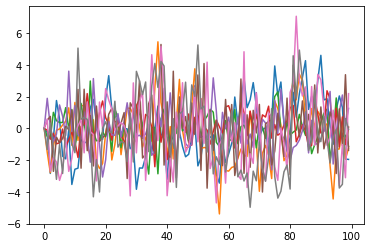

In [71]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
T, n, s = 100, 10, 25

## Coefficient matrix
A_true = generate_A(n, s)

## True permutation
P_true = np.random.permutation(np.identity(n))

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

## Only print matrices when n <= 10
if n <= 10:
    print(f"A:\n{np.round(A_true, 2)}\n\nP:\n{P_true}.\n\nW:\n{np.round(P_true.T @ A_true @ P_true, 2)}")


[[ 0.   -0.66  0.66 -0.59 -0.67  0.    0.    0.    0.52  0.  ]
 [ 0.    0.32  0.    0.    0.    0.    0.43  0.   -0.42  0.54]
 [ 0.    0.    0.   -0.64  0.45  0.63 -0.66 -0.35  0.45  0.62]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.46  0.62  0.    0.    0.    0.58]
 [ 0.    0.    0.    0.    0.    0.55  0.69 -0.58  0.    0.63]
 [ 0.    0.    0.    0.    0.    0.    0.63  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.62  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


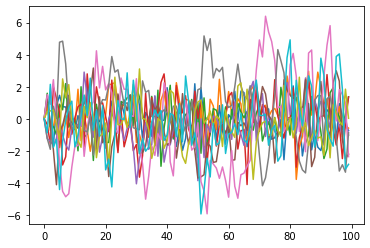

In [63]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
n, s, T = 10, 25, 100

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
W_true = h.generate_A(n, s, tril = False, low = 0.30, high = 0.70)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(W_true)):
    W_true[i][i] = np.abs(W_true[i][i])

W_true = W_true.T

P_true = np.identity(n)

X = h.generate_var_2(T, n, W_true, np.identity(n))
plt.plot(X);

print(np.round(W_true, 2))

In [9]:
import statsmodels.api as sm

def ols_W(X, P, LT = False):
    # translate X
    x = X @ P.T
    
    # get regressor and varibles
    y = x[1:]
    x = x[:-1]

    W_hat = np.array(np.zeros(n)).T

    # get parameters
    for i in range(n):
        est = sm.OLS(y[:, i], x[:, i:]).fit() 
        print(est.params)
        W_hat = np.vstack((W_hat, np.append(np.zeros(i), est.params).T))
    
    if LT:
        return W_hat[1:].T
    
    return P.T @ W_hat[1:].T @ P

ols_W(X, P_true)

[ 0.71415413 -0.02533413  0.47608172  0.06240372 -0.04164361 -0.06835644
 -0.33655022 -0.67493476 -0.31504854 -0.64191848]
[ 1.16252143e-02 -4.61444731e-01  1.12678870e-04  5.99879354e-01
 -5.56073255e-02 -9.74268170e-02  5.18083143e-01  3.92861204e-01
  5.57864376e-01]
[ 0.03752161  0.01907024 -0.37813551  0.33830915  0.04375666  0.04869564
  0.43619826 -0.48367687]
[-0.06480033 -0.6501076   0.05911582 -0.0496292  -0.10026726 -0.45409446
 -0.48299487]
[ 0.25725163 -0.0346776  -0.03312533 -0.09335913 -0.66053606 -0.55028851]
[ 0.34569684  0.07057724  0.05025482 -0.01281764 -0.05280664]
[ 0.08867788  0.00197706 -0.4523203   0.37463185]
[0.59831449 0.07293781 0.06187898]
[ 0.04450437 -0.03956857]
[-0.04864227]


array([[ 7.14154126e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.53341317e-02,  1.16252143e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.76081725e-01, -4.61444731e-01,  3.75216112e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.24037208e-02,  1.12678870e-04,  1.90702381e-02,
        -6.48003328e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-4.16436095e-02,  5.99879354e-01, -3.78135511e-01,
        -6.50107598e-01,  2.57251631e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [66]:
for P in Ps:
    P = np.flip(P)
    print(np.allclose(W_true[:, P][P, :], np.triu(W_true[:, P][P, :])))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [54]:
import statsmodels.api as sm

def ols_W2(X, P, LT = False):
    # translate X
    x = X @ P.T

    W_hat = np.zeros((n, n))

    # get parameters
    for i in range(n):
        W_hat[i:, i] = np.linalg.inv(x[:-1, i:].T @ x[:-1, i:]) @ x[:-1, i:].T @ x[1:, i]      
        # W_hat[i:, i] = sm.OLS(x[1:, i], x[:-1, i:]).fit().params
    
    return P.T @ W_hat @ P

W = ols_W2(X, P_true)
loss(W)

10.119788718875807

In [68]:
def ols_W3(X, P, LT = False):
    # translate X
    x = X[:, P]

    W_hat = np.zeros((n, n))

    # get parameters
    for i in range(n):
        W_hat[i:, i] = np.linalg.inv(x[:-1, i:].T @ x[:-1, i:]) @ x[:-1, i:].T @ x[1:, i]      
        # W_hat[i:, i] = sm.OLS(x[1:, i], x[:-1, i:]).fit().params
    
    return W_hat[:, P][P, :]

W = ols_W3(X, range(n))
loss(W)

19.033570031088708

In [72]:
Ps = np.load("Ps_Ex.npy")

W = selected_search(X, Ps)
print(loss(W))

print(np.round(W, 2))

  7%|█████▎                                                                         | 68/1020 [00:00<00:01, 673.30it/s]

New best: 22.81799738104314
New best: 22.435878268930608
New best: 21.14760465811405
New best: 20.788806315191206
New best: 20.731691948223617
New best: 20.010301219764205
New best:

 20%|███████████████▉                                                              | 209/1020 [00:00<00:01, 645.14it/s]

 19.957610954711082
New best: 19.912752947346405
New best: 19.874373387014536


 46%|███████████████████████████████████▌                                          | 465/1020 [00:00<00:00, 594.96it/s]

New best: 19.25600397796995


 79%|█████████████████████████████████████████████████████████████▊                | 808/1020 [00:01<00:00, 537.83it/s]

New best: 19.127742454412505
New best: 19.089362894080633
New best: 19.054415269016705
New best: 19.016035708684836


100%|█████████████████████████████████████████████████████████████████████████████| 1020/1020 [00:01<00:00, 566.04it/s]

New best: 18.99726707443572
18.99726707443572
[[-0.01  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.    0.22  0.12  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.04  0.   -0.17  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.08 -0.12 -0.14  0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.17  0.12 -0.03  0.17  0.25  0.    0.    0.    0.    0.  ]
 [ 0.06  0.04 -0.04 -0.09  0.08  0.57  0.    0.    0.    0.  ]
 [ 0.03  0.01  0.08 -0.07  0.06  0.02  0.61  0.    0.    0.  ]
 [ 0.08  0.08  0.08 -0.2   0.03  0.14 -0.17  0.63  0.09  0.  ]
 [ 0.08 -0.16  0.01 -0.19 -0.06 -0.07 -0.09  0.    0.26  0.  ]
 [ 0.04 -0.04 -0.01  0.03 -0.05  0.07  0.33 -0.31  0.03  0.4 ]]


In [69]:
def selected_search(X, Ps):
    _, n = np.shape(X)
    W_best = np.identity(n)
    MSE_best = np.inf
    
    for perm in tqdm(Ps, total=np.shape(Ps)[0]):
        W = ols_W3(X, np.flip(perm))
        MSE_W = loss(W)
        
        if MSE_W < MSE_best:
            MSE_best = MSE_W
            print("New best:", MSE_best)
            W_best = W
            
    return W_best

In [33]:
def exhaustive_search(X):
    _, n = np.shape(X)
    W_best = np.identity(n)
    MSE_best = np.inf
    
    for perm in tqdm(itertools.permutations(np.identity(n)), total=np.math.factorial(n)):
        W = ols_W2(X, np.array(perm))
        MSE_W = loss(W)
        
        if MSE_W < MSE_best:
            MSE_best = MSE_W
            W_best = W
            
    return W_best

exhaustive_search(X)

  0%|                                                                         | 969/3628800 [00:01<1:48:38, 556.58it/s]


KeyboardInterrupt: 

In [11]:
def loss(W):
    M = X @ W
    
    # Remove X[0] and XW[last]
    R = X[1:] - M[:-1]
    
    # Frobenius norm squared loss
    loss = 1 / X[1:].shape[0] * (R ** 2).sum()
    
    return loss